# Task 3 - To Explore Unsupervised Machine Learning



***Surbhi Jain***

### Importing Libraries


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


### Reading the Data

In [7]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
iris_data.info()           #getting summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


### Visualizing The Data

<AxesSubplot:title={'center':'Sepal_Width(cm) vs Sepal_Length(cm)'}, xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

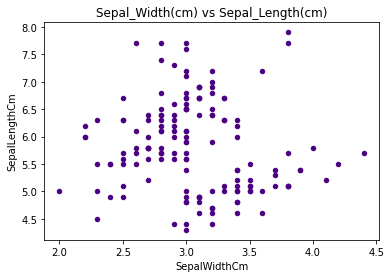

In [11]:
iris_data.plot(kind = 'scatter',x='SepalWidthCm',y='SepalLengthCm',title = 'Sepal_Width(cm) vs Sepal_Length(cm)',c="indigo")


<AxesSubplot:title={'center':'Petal_Length(cm) vs Petal_Width(cm)'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

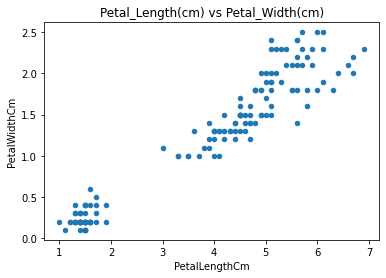

In [12]:
iris_data.plot(kind = 'scatter',x='PetalLengthCm',y='PetalWidthCm',title = 'Petal_Length(cm) vs Petal_Width(cm)')


<AxesSubplot:title={'center':'Petal_Width(cm) vs Sepal_Length(cm)'}, xlabel='PetalWidthCm', ylabel='SepalLengthCm'>

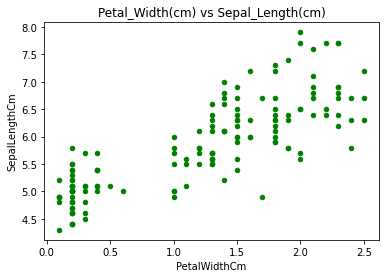

In [13]:
iris_data.plot(kind = 'scatter',x='PetalWidthCm',y='SepalLengthCm',title = 'Petal_Width(cm) vs Sepal_Length(cm)',c="green")


<AxesSubplot:title={'center':'Sepal_Length(cm) vs Petal_Width(cm)'}, xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

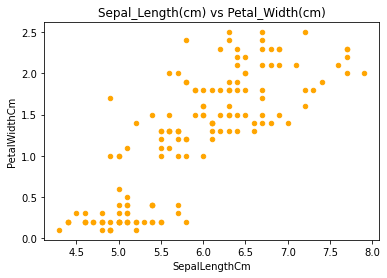

In [14]:
iris_data.plot(kind = 'scatter',x='SepalLengthCm',y='PetalWidthCm',title = 'Sepal_Length(cm) vs Petal_Width(cm)', c="orange")


### Clustering-
We are using Elbow method to find the optimum number of clusters in the Data



In [31]:
Dt = []

for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(iris_data)       # fitting the data
    Dt.append(sum(np.min(cdist(iris_data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / iris_data.shape[0])

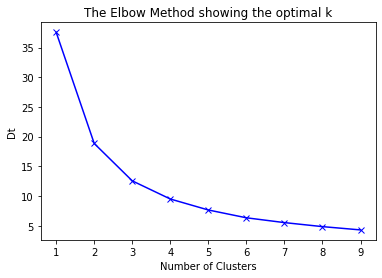

In [34]:
plt.plot(range(1, 10), Dt,"bx-")
plt.xlabel('Number of Clusters')
plt.ylabel('Dt')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [36]:
X_std = StandardScaler().fit_transform(iris_data)    # fitting the data to standard scaler


### KMeans Implementation


In [37]:
kmean = KMeans(n_clusters=3, max_iter=100)
kmean.fit(X_std)

KMeans(max_iter=100, n_clusters=3)

In [38]:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)



KMeans(max_iter=100, n_clusters=3, n_jobs=None, precompute_distances='auto')

### Plotting the Clustered Data

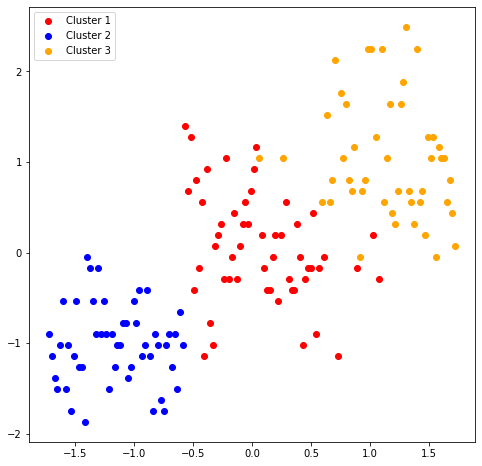

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(X_std[kmean.labels_ == 0, 0], X_std[kmean.labels_ == 0, 1],
            c='red', label='Cluster 1')

plt.scatter(X_std[kmean.labels_ == 1, 0], X_std[kmean.labels_ == 1, 1],
            c='blue', label='Cluster 2')

plt.scatter(X_std[kmean.labels_ == 2, 0], X_std[kmean.labels_ == 2, 1],
            c='orange', label='Cluster 3')

plt.legend()
